<a href="https://colab.research.google.com/github/Amankumar1492/The-Canteen-Menu-Optimizer/blob/main/Another_copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification Challenges**

#  The Canteen Menu Optimizer
# The SNU canteen manager wants to predict dietary preferences to stock food items better.

📊 Target: dietary_preference

📊 Features: cuisine_top1, spice_tolerance, sweet_tooth_level

🧩 Task: Predict diet type (Veg/Non-Veg/Vegan/etc.).

🏆 Impact: Reduces food waste, improves menu planning.

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


In [3]:
# 2. Load Dataset
file_path = "Data Collection for ML mini project (Responses) - Form Responses 1.csv"
df = pd.read_csv(file_path)

In [4]:

# 3. Select Relevant Features
df = df[['Cuisine_top1', 'Spice Tolerance', 'Sweet tooth level (1 is low and 5 is high)', 'Dietary Preference']]


In [5]:
# Rename for simplicity
df.rename(columns={
    'Spice Tolerance': 'spice_tolerance',
    'Sweet tooth level (1 is low and 5 is high)': 'sweet_tooth',
    'Cuisine_top1': 'cuisine_top1',
    'Dietary Preference': 'dietary_preference'
}, inplace=True)


In [6]:
# 4. Handle Missing Values (if any)
df.dropna(inplace=True)

In [7]:
# 5. Split Features and Target
X = df[['cuisine_top1', 'spice_tolerance', 'sweet_tooth']]
y = df['dietary_preference']

In [8]:
# 6. Preprocessing: Encoding + Scaling
categorical_features = ['cuisine_top1']
numeric_features = ['spice_tolerance', 'sweet_tooth']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)


In [9]:
# 7. Build Model Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [10]:

# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
# 9. Train Model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cuisine_top1']),
                                                 ('num', StandardScaler(),
                                                  ['spice_tolerance',
                                                   'sweet_tooth'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [12]:
# 10. Predictions
y_pred = model.predict(X_test)

In [18]:

# 11. Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ F1 Score (weighted):", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.782608695652174
✅ F1 Score (weighted): 0.7434782608695653

Classification Report:
               precision    recall  f1-score   support

  Eggitarian       0.00      0.00      0.00         1
        Jain       0.00      0.00      0.00         1
     Non-Veg       0.86      0.95      0.90        19
         Veg       0.00      0.00      0.00         1
       Vegan       0.00      0.00      0.00         1

    accuracy                           0.78        23
   macro avg       0.17      0.19      0.18        23
weighted avg       0.71      0.78      0.74        23



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


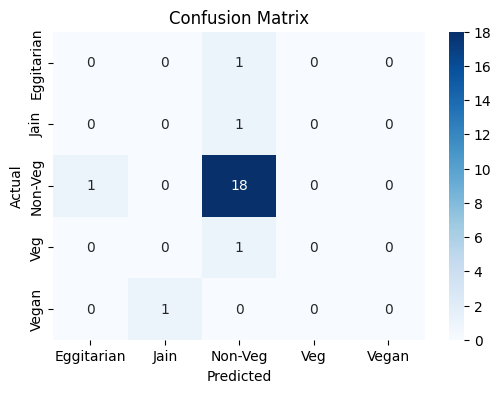

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [20]:
# 12. Feature Importance
clf = model.named_steps['classifier']
importances = clf.feature_importances_


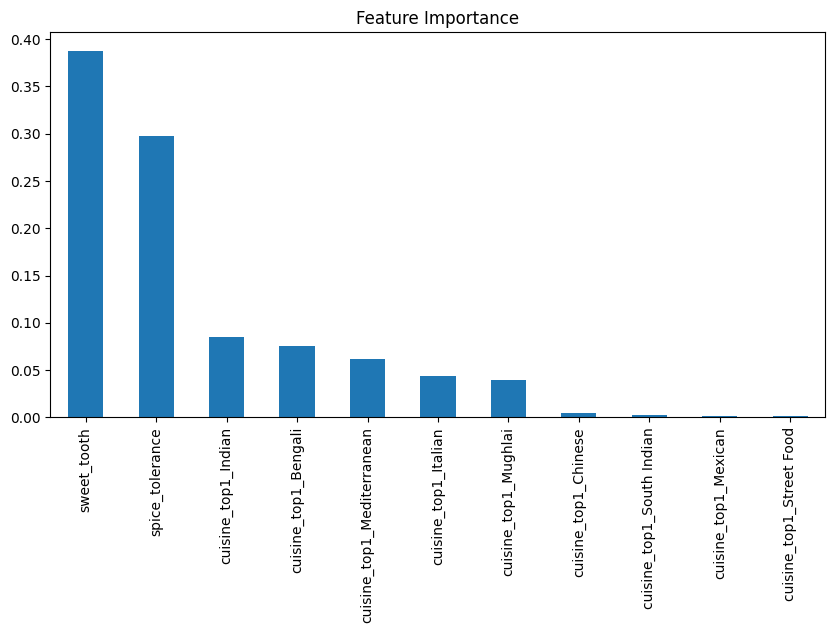

In [21]:

# Get feature names after one-hot encoding
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
encoded_cats = ohe.get_feature_names_out(['cuisine_top1'])
all_features = list(encoded_cats) + numeric_features

feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(10,5), title="Feature Importance")
plt.show()